Evolución Diferencial
===

* 30:00 min | Última modificación: Mayo 23, 2021 | [YouTube]

## Función a minimizar

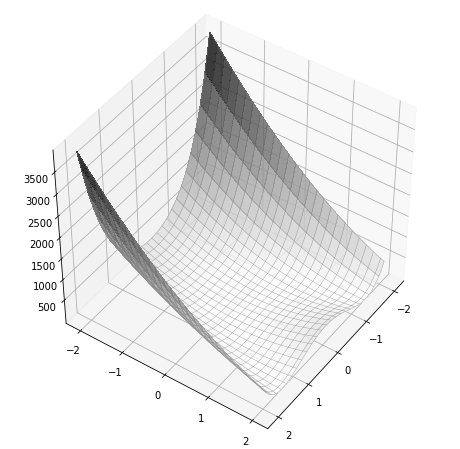

In [1]:
from EAOS.benchmarks import Ackley, Griewank, Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

## Algoritmo

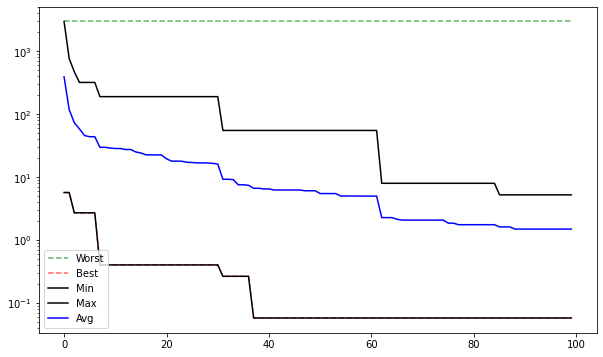

In [2]:
from EAOS.algorithms import DifferentialEvolution
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor

POPSIZE = 20
NGEN = 100


generate_population = RandomUniform(
    popsize=POPSIZE,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

evaluate = FnEvaluator(fn=fn)

optimizer = DifferentialEvolution(
    fn=fn,
    LB=fn.LB,
    UB=fn.UB,
    crossover_rate=0.9,
    stepsize=0.8,
    seed=123456,
)

monitor = Monitor()

population = generate_population()
population = evaluate(population)

for _ in range(NGEN):
    population = optimizer(population)
    monitor(population)


monitor.plot_stats()

In [3]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([1.50587862, 1.77888084]), 0.057722764023380065)